### Collecting Training Data
In order to start collecting training data, you'll need to do the following:

* Enter Training Mode in the simulator.
* Start driving the car to get a feel for the controls.
* When you are ready, hit the record button in the top right to start recording.
* Continue driving for a few laps or till you feel like you have enough data.
* Hit the record button in the top right again to stop recording.

### Strategies for Collecting Data
Now that you have driven the simulator and know how to record data, it's time to think about collecting data that will ensure a successful model. There are a few general concepts to think about that we will later discuss in more detail:

* the car should stay in the center of the road as much as possible
* if the car veers off to the side, it should recover back to center
* driving counter-clockwise can help the model generalize
* flipping the images is a quick way to augment the data
* collecting data from the second track can also help generalize the model
* we want to avoid overfitting or underfitting when training the model
* knowing when to stop collecting more data




pip install --upgrade --ignore-installed setuptools

pip install python-socketio

python drive.py model.h5

python drive.py model.h5 run1

python video.py run1

python video.py run1 --fps 48


In [1]:
#Keras强制使用CPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [ ]:
import csv
import cv2
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Conv2D, Dropout
# from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import matplotlib.pyplot as plt

lines=[]
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
        
images = []
measurements = []
for line in lines:
    for i in range(3):#center,left,right
        source_path = line[i]
#         filename = source_path.split('/')[-1]
        filename = source_path.split('\\')[-1]
        current_path = './data/IMG/'+filename
        if(os.path.exists(current_path)):
            #OpenCV (cv2.imread command) reads a image in BGR, and the code in drive.py, in RGB
            image = cv2.imread(current_path)#BGR 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)


#Data augmentation        
augmented_images, augmented_measurements = [],[]
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image, 1))
    augmented_measurements.append(measurement*-1.0)

# print(augmented_images[0].shape)
# plt.imshow(augmented_images[0])


X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)


#Use Keras to train a network to do the following:
#1.Take in an image from the center camera of the car. This is the input to your neural network.
#2.Output a new steering angle for the car. 

model = Sequential()
# set up lambda layer
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160, 320, 3)))#cv2 read image height*width
#Cropping2D Layer
# model.add(Cropping2D(cropping=((50,20),(0,0))))
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))

# model.add(Convolution2D(24,5,5, subsample=(2,2),activation="relu"))
# model.add(Convolution2D(36,5,5, subsample=(2,2),activation="relu"))
# model.add(Convolution2D(48,5,5, subsample=(2,2),activation="relu"))
# model.add(Convolution2D(64,3,3, activation="relu"))
# model.add(Convolution2D(64,3,3, activation="relu"))

model.add(Conv2D(24, (5, 5), strides=(2, 2), activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(36, (5,5), strides=(2,2), activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same')) 
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (5,5), strides=(2,2), activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
# model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3,3), activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(1))

#LeNet
# model.add(Convolution2D(6, 5, 5, activation="relu"))
# model.add(MaxPooling2D())
# model.add(Convolution2D(6, 5, 5, activation="relu"))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Dense(84))
# model.add(Dense(1))

model.summary()          
          
model.compile(loss='mse', optimizer='adam')
history_object = model.fit(X_train, y_train, batch_size=64, validation_split=0.3, shuffle=True, epochs=5)

model.save("model.h5")
         
          
          

Using TensorFlow backend.


dict_keys(['val_loss', 'loss'])


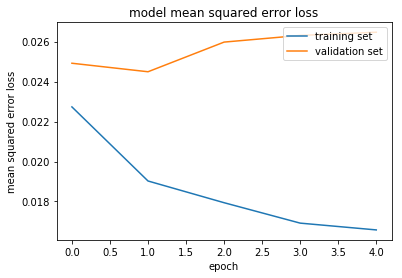

In [3]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

 ### 1.Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
 Cause:CUDA Tool Kit version is 10.1,TensorFlow supports CUDA 10.0 (TensorFlow >= 1.13.0)
 
 
 